<a href="https://colab.research.google.com/github/mmoran90/death-classification/blob/main/2Copy_of_final_project_eda_km_updates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katie Mears - Final Project
Reclassifying Undetermined Deaths
EDA

### Load Packages

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Read Data and Explore Variables

In [81]:
# Read in the 2015_data
death_data = pd.read_csv('/2015_data.csv')
# Display the first few rows of the data
print(death_data.head())

/var/folders/bj/4_046k_n1259zwtr2hcbxcbw0000gn/T/ipykernel_61027/4196476569.py:2: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  death_data = pd.read_csv('/Users/clairebentzen/Desktop/MDAS/ADS 502 - Applied Data Mining/archive/2015_data.csv')


   resident_status  education_1989_revision  education_2003_revision  \
0                1                      NaN                      3.0   
1                1                      NaN                      6.0   
2                1                      NaN                      3.0   
3                1                      NaN                      3.0   
4                1                      NaN                      5.0   

   education_reporting_flag  month_of_death sex  detail_age_type  detail_age  \
0                         1               1   M                1          84   
1                         1               1   M                1          70   
2                         1               1   F                1          91   
3                         1               1   F                1          40   
4                         1               1   F                1          89   

   age_substitution_flag  age_recode_52  ...  record_condition_18  \
0                

In [82]:
# Print Column Titles in Original Data Set
column_titles = death_data.columns
print(column_titles)

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

In [83]:
# Data Description of Original data set (2015_data.csv)
data_description_all = death_data.describe(include='all')
print(data_description_all)

        resident_status  education_1989_revision  education_2003_revision  \
count      2.718198e+06             73043.000000             2.645155e+06   
unique              NaN                      NaN                      NaN   
top                 NaN                      NaN                      NaN   
freq                NaN                      NaN                      NaN   
mean       1.226700e+00                12.602371             3.718700e+00   
std        4.993832e-01                 9.516661             1.985368e+00   
min        1.000000e+00                 0.000000             1.000000e+00   
25%        1.000000e+00                11.000000             3.000000e+00   
50%        1.000000e+00                12.000000             3.000000e+00   
75%        1.000000e+00                13.000000             5.000000e+00   
max        4.000000e+00                99.000000             9.000000e+00   

        education_reporting_flag  month_of_death      sex  detail_age_type 

In [84]:
# Convert manner_of_death to homicide or not homicide
death_data['manner_of_death'] = death_data['manner_of_death'].replace([1, 2, 4, 5, 6, 7, None],0)
death_data['manner_of_death'] = death_data['manner_of_death'].replace([3],1)

### Missing Data

In [85]:
# Print Missing Values per Column
missing_values_count = death_data.isnull().sum()
print(missing_values_count)

resident_status                     0
education_1989_revision       2645155
education_2003_revision         73043
education_reporting_flag            0
month_of_death                      0
                               ...   
race_imputation_flag          2692049
race_recode_3                       0
race_recode_5                       0
hispanic_origin                     0
hispanic_originrace_recode          0
Length: 77, dtype: int64


In [86]:
# Print Missing Data as percentage (per column)
total_rows = death_data.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

resident_status                0.000000
education_1989_revision       97.312815
education_2003_revision        2.687185
education_reporting_flag       0.000000
month_of_death                 0.000000
                                ...    
race_imputation_flag          99.038002
race_recode_3                  0.000000
race_recode_5                  0.000000
hispanic_origin                0.000000
hispanic_originrace_recode     0.000000
Length: 77, dtype: float64


In [87]:
total_missing_values = death_data.isnull().sum().sum()
total_elements = death_data.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 54.43%


In [88]:
# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition',
                   'autopsy', 'race','detail_age']
new_death = death_data[desired_columns]

# List of column names to convert to categorical
categorical_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death',
                   'method_of_disposition', 'autopsy', 'race']

# Convert the selected columns to categorical
new_death[categorical_columns] = new_death[categorical_columns].astype('category')
print(new_death.head())

  education_2003_revision month_of_death sex  \
0                     3.0              1   M   
1                     6.0              1   M   
2                     3.0              1   F   
3                     3.0              1   F   
4                     5.0              1   F   

  place_of_death_and_decedents_status marital_status day_of_week_of_death  \
0                                   1              M                    1   
1                                   1              M                    2   
2                                   4              W                    6   
3                                   4              S                    5   
4                                   6              W                    5   

  injury_at_work manner_of_death method_of_disposition autopsy race  \
0              U             0.0                     B       N    1   
1              U             0.0                     C       N    1   
2              U             0.0   

/var/folders/bj/4_046k_n1259zwtr2hcbxcbw0000gn/T/ipykernel_61027/2816157346.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_death[categorical_columns] = new_death[categorical_columns].astype('category')


In [89]:
# Get the data types for all columns
data_types = new_death.dtypes

print(data_types)

education_2003_revision                category
month_of_death                         category
sex                                    category
place_of_death_and_decedents_status    category
marital_status                         category
day_of_week_of_death                   category
injury_at_work                         category
manner_of_death                        category
method_of_disposition                  category
autopsy                                category
race                                   category
detail_age                                int64
dtype: object


In [90]:
total_missing_values2 = new_death.isnull().sum().sum()
total_elements2 = new_death.size
total_percent_missing2 = (total_missing_values2 / total_elements2) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing2))

Total percentage of missing data in the sample dataset: 1.41%


In [91]:
# Drop rows with missing values
death_dropped = new_death.dropna()

In [92]:
total_missing_values3 = death_dropped.isnull().sum().sum()
total_elements3 = death_dropped.size
total_percent_missing3 = (total_missing_values3 / total_elements3) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing3))

Total percentage of missing data in the sample dataset: 0.00%


In [93]:
summary_stats = death_dropped.describe()
print(summary_stats)

         detail_age
count  2.259277e+06
mean   7.303003e+01
std    2.304356e+01
min    1.000000e+00
25%    6.300000e+01
50%    7.700000e+01
75%    8.700000e+01
max    9.990000e+02


### Random Sample

In [94]:
import random
import numpy as np

In [95]:
# Perform random sampling
sampled_df = death_dropped.sample(frac=0.3, random_state=1)
print('Number of rows after random sampling = %d' % (sampled_df.shape[0]))

Number of rows after random sampling = 677783


In [96]:
# Value Counts for each Categorical Variable
education_counts = sampled_df['education_2003_revision'].value_counts()
print("education_2003_revision Frequency:")
print(education_counts)

month_of_death_counts = sampled_df['month_of_death'].value_counts()
print("month_of_death Frequency:")
print(month_of_death_counts)

sex_counts = sampled_df['sex'].value_counts()
print("sex Frequency:")
print(sex_counts)

place_of_death_and_decedents_status_counts = sampled_df['place_of_death_and_decedents_status'].value_counts()
print("place_of_death_and_decedents_status Frequency:")
print(place_of_death_and_decedents_status_counts)

marital_status_counts = sampled_df['marital_status'].value_counts()
print("marital_status Frequency:")
print(marital_status_counts)

day_of_week_of_death_counts = sampled_df['day_of_week_of_death'].value_counts()
print("day_of_week_of_death Frequency:")
print(day_of_week_of_death_counts)

injury_at_work_counts = sampled_df['injury_at_work'].value_counts()
print("injury_at_work Frequency:")
print(injury_at_work_counts)

manner_of_death_counts = sampled_df['manner_of_death'].value_counts()
print("manner_of_death Frequency:")
print(manner_of_death_counts)

method_of_disposition_counts = sampled_df['method_of_disposition'].value_counts()
print("method_of_disposition Frequency:")
print(method_of_disposition_counts)

autopsy_counts = sampled_df['autopsy'].value_counts()
print("autopsy Frequency:")
print(autopsy_counts)

race_counts = sampled_df['race'].value_counts()
print("race Frequency:")
print(race_counts)


education_2003_revision Frequency:
education_2003_revision
3.0    281999
4.0     78091
2.0     72436
1.0     72036
6.0     65069
5.0     40106
9.0     31633
7.0     26068
8.0     10345
Name: count, dtype: int64
month_of_death Frequency:
month_of_death
1     66765
3     61026
2     56901
4     56668
12    56629
5     56343
10    55466
7     54574
8     53963
11    53891
6     52912
9     52645
Name: count, dtype: int64
sex Frequency:
sex
M    345765
F    332018
Name: count, dtype: int64
place_of_death_and_decedents_status Frequency:
place_of_death_and_decedents_status
1    197321
4    196433
6    134749
5     58996
2     45141
7     41525
3      3291
9       327
Name: count, dtype: int64
marital_status Frequency:
marital_status
M    249477
W    226811
D    105837
S     90588
U      5070
Name: count, dtype: int64
day_of_week_of_death Frequency:
day_of_week_of_death
5    97866
7    97587
6    97077
1    97031
2    96619
4    95807
3    95762
9       34
Name: count, dtype: int64
injury_at_

### Remove Outliers

In [97]:
# Compute z-score for every data point in detail_age
sampled_df['z_detail_age'] = (sampled_df['detail_age']-sampled_df['detail_age'].mean())/sampled_df['detail_age'].std()
print('Number of rows before discarding outliers = %d' % (sampled_df.shape[0]))

# Removes rows with a zscore beyond 3 or -3
sampled_df = sampled_df[(sampled_df['z_detail_age'] <= 3) & (sampled_df['z_detail_age'] >= -3)]
print('Number of rows after discarding missing values = %d' % (sampled_df.shape[0]))

# Drop the 'C' column
column_name = 'z_detail_age'
sampled_df.drop(column_name, axis=1, inplace=True)

Number of rows before discarding outliers = 677783
Number of rows after discarding missing values = 673128


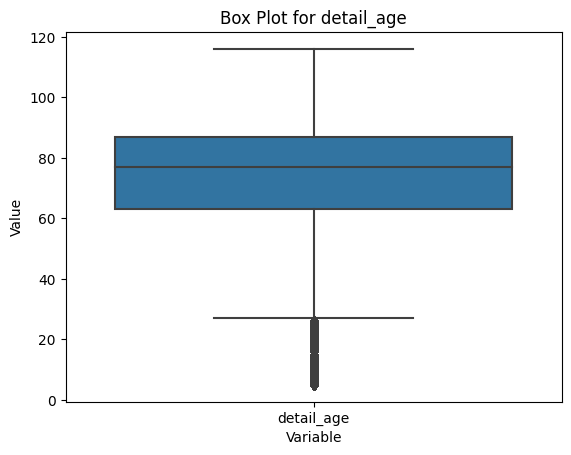

In [98]:
# Non-Normalized Sample
sns.boxplot(data=sampled_df[['detail_age']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("Box Plot for detail_age")
plt.show()

### Normalize Data and Encode Categorical Variables

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
# Normalize detail_age using Min-Max scaler
mms = MinMaxScaler()
sampled_df[['detail_age']] = mms.fit_transform(sampled_df[['detail_age']])

In [102]:
# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(sampled_df, columns=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race'],
                            prefix=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race'])

### Class Imbalances

In [123]:
# Calculate class proportions
class_proportions = encoded_df['manner_of_death'].value_counts(normalize=True)

print(class_proportions)

manner_of_death
0.0    0.992186
1.0    0.007814
Name: proportion, dtype: float64


In [124]:
# Split data for rebalancing
train, test = train_test_split(encoded_df, test_size=0.3, random_state=42)

In [125]:
# Identify current proportion of homicide records
total = train.shape[0]
print('\nTotal number of instances in train sample: ', total)

homicide = train['manner_of_death'].value_counts()[1]
print('\nTotal number of homicide instances in train sample: ', homicide)

# Calculate number to resample
x = ((0.2 * total) - homicide) / 0.8
print('\nNumber of homicide records to resample: ', int(x))

# Resample data to increase number of homicide records
to_resample = train.loc[train['manner_of_death'] == 1]
our_resample = to_resample.sample(n = int(x), replace = True)
encoded_df_rebal = pd.concat([train, our_resample])
encoded_df_rebal['manner_of_death'].value_counts()

# Check percentage is met
ratio = encoded_df_rebal['manner_of_death'].value_counts()[1] / encoded_df_rebal.shape[0] * 100
print('\nNew percent of homicide records: ', round(ratio, 0))


Total number of instances in train sample:  471189

Total number of homicide instances in train sample:  3719

Number of homicide records to resample:  113148

New percent of homicide records:  20.0


### Column Distributions

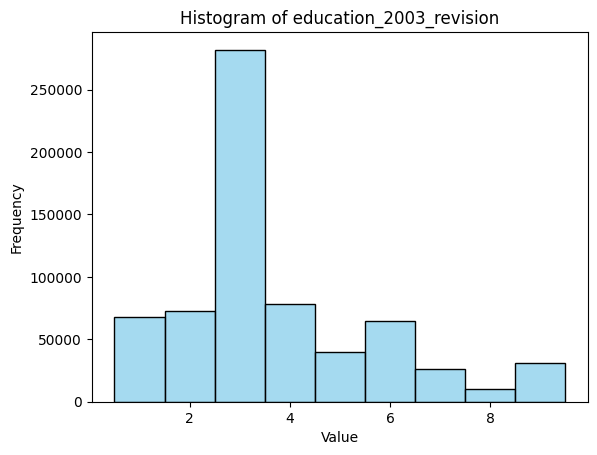

In [103]:
education_2003_revision  = sampled_df['education_2003_revision']
sns.histplot(education_2003_revision, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of education_2003_revision')
plt.show()

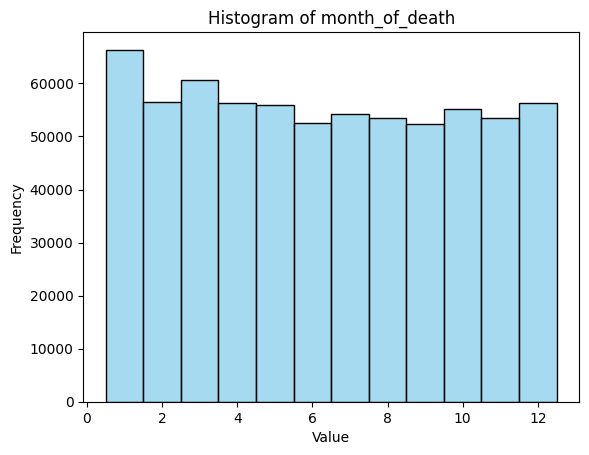

In [104]:
month_of_death = sampled_df['month_of_death']
sns.histplot(month_of_death, bins=12
             , color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of month_of_death')
plt.show()

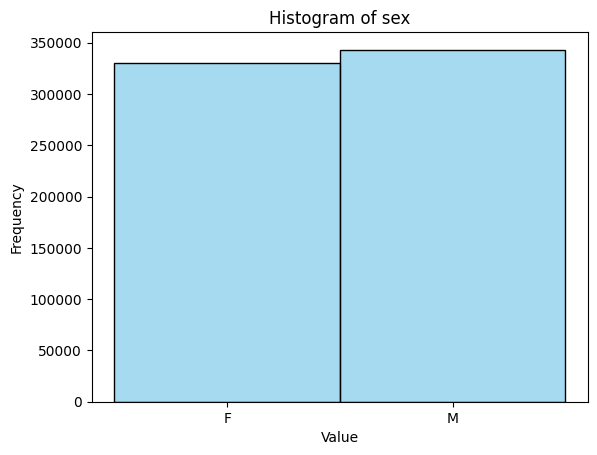

In [105]:
sex = sampled_df['sex']
sns.histplot(sex, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sex')
plt.show()

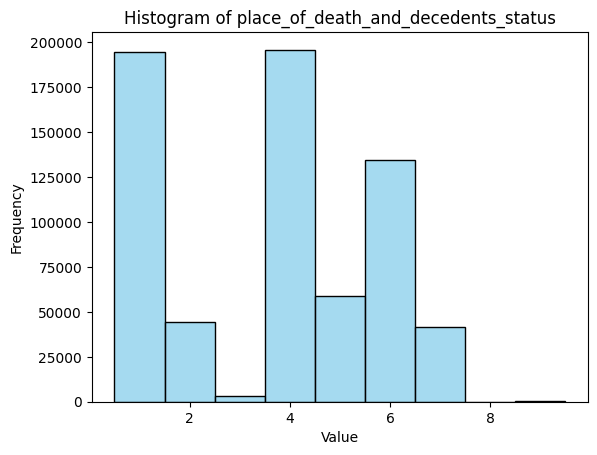

In [106]:
place_of_death_and_decedents_status = sampled_df['place_of_death_and_decedents_status']
sns.histplot(place_of_death_and_decedents_status, bins=9, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of place_of_death_and_decedents_status')
plt.show()

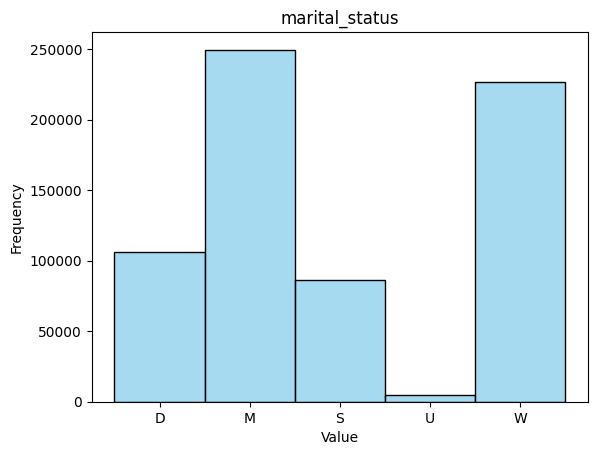

In [107]:
marital_status = sampled_df['marital_status']
sns.histplot(marital_status, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('marital_status')
plt.show()

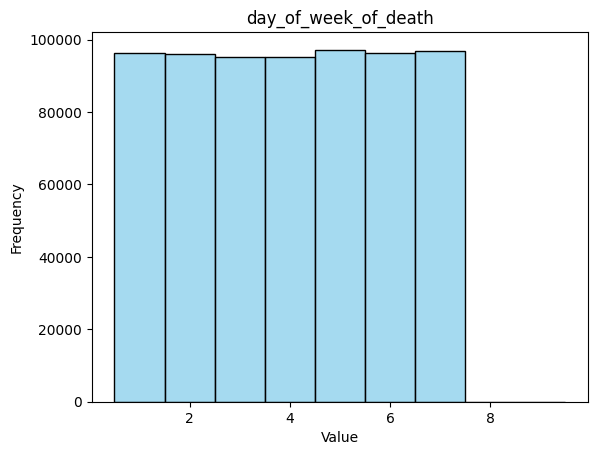

In [108]:
day_of_week_of_death = sampled_df['day_of_week_of_death']
sns.histplot(day_of_week_of_death, bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('day_of_week_of_death')
plt.show()

In [ ]:
injury_at_work = sampled_df['injury_at_work']
sns.histplot(injury_at_work, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('injury_at_work')
plt.show()

In [ ]:
method_of_disposition = sampled_df['method_of_disposition']
sns.histplot(method_of_disposition, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('method_of_disposition')
plt.show()

In [ ]:
autopsy = sampled_df['autopsy']
sns.histplot(autopsy, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('autopsy')
plt.show()

In [ ]:
icd_code_10th_revision = sampled_df['icd_code_10th_revision']
sns.histplot(icd_code_10th_revision, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('icd_code_10th_revision')
plt.show()

In [ ]:
cause_recode358 = sampled_df['358_cause_recode']
sns.histplot(cause_recode358, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('358_cause_recode')
plt.show()

In [ ]:
cause_recode113 = sampled_df['113_cause_recode']
sns.histplot(cause_recode113, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('113_cause_recode')
plt.show()

In [ ]:
cause_recode39 = sampled_df['39_cause_recode']
sns.histplot(cause_recode39, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('39_cause_recode')
plt.show()

In [ ]:
race = sampled_df['race']
sns.histplot(race, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('race')
plt.show()

In [ ]:
detail_age = sampled_df['detail_age']
sns.histplot(detail_age, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('detail_age')
plt.show()

In [ ]:
manner_of_death = sampled_df['manner_of_death']
sns.histplot(manner_of_death, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('manner_of_death')
plt.show()

### Correlations

In [24]:
sampled_df = sampled_df.dropna()

In [25]:
# pip install prince
import prince

In [26]:
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Perform MCA
mca = prince.MCA(n_components=16)
mca.fit(sampled_df)

# Access the eigenvalues and calculate the explained variance ratio
eigenvalues = mca.eigenvalues_
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Access the results
print("Eigenvalues:")
print(mca.eigenvalues_)


print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


print("\nPrincipal Coordinates:")
print(mca.row_coordinates(sampled_df))  # Coordinates of rows (observations)
print(mca.column_coordinates(sampled_df))  # Coordinates of columns (categories)


Eigenvalues:
[0.22883085 0.15403345 0.11371935 0.10777275 0.10029187 0.09396224
 0.08854242 0.08788135 0.08719828 0.08698456 0.0860387  0.08539267
 0.08532041 0.08483312 0.08454644 0.08453645]

Explained Variance Ratio:
[0.13785947 0.09279767 0.06851038 0.06492785 0.06042098 0.05660769
 0.0533425  0.05294424 0.05253273 0.05240397 0.05183414 0.05144494
 0.0514014  0.05110783 0.05093512 0.0509291 ]

Principal Coordinates:
               0         1         2         3         4         5         6   \
1061527  0.151251 -0.323178  0.470255 -0.186752 -0.709300  0.253914  0.290838   
1726871  0.147982  0.256345  0.194491  0.634478  0.551173  0.453858  0.069191   
1496687 -0.196620 -0.196263  0.030941 -0.143662 -0.095248  0.188135 -0.031591   
2100099 -0.480725  0.451967 -0.065697  0.001025 -0.124588  0.204433  0.093638   
781021  -0.168516 -0.108790  0.204354  0.051407 -0.090305  0.272955  0.371993   
...           ...       ...       ...       ...       ...       ...       ...   
816673  -

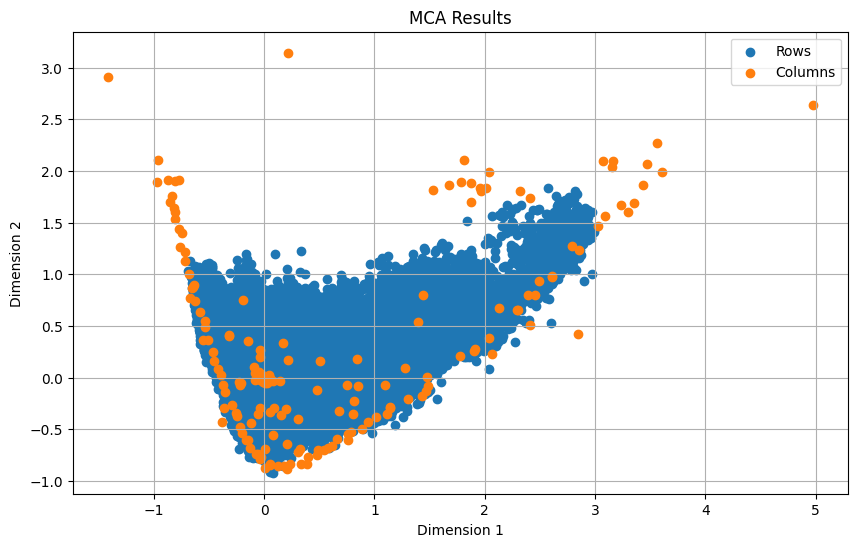

In [27]:
# Plot MCA results
plt.figure(figsize=(10, 6))
plt.scatter(mca.row_coordinates(sampled_df).iloc[:, 0], mca.row_coordinates(sampled_df).iloc[:, 1], label='Rows')
plt.scatter(mca.column_coordinates(sampled_df).iloc[:, 0], mca.column_coordinates(sampled_df).iloc[:, 1], label='Columns')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [28]:
# import matplotlib.pyplot as plt
# !pip install pandas scipy
from scipy.stats import chi2_contingency

In [29]:
# Convert the categorical data to numerical labels (optional if already numeric)
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['detail_age'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.27665945772788403


In [30]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['race'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.10744155060800359


In [31]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['sex'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.05365728043310728


In [32]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['autopsy'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.28444560699554244


In [33]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['marital_status'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.14682648676188895


In [34]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['month_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.013125702445144992


In [35]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['education_2003_revision'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.048291703487682906


In [36]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['day_of_week_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.007811026197364051


In [37]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.26393129675041527


In [38]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['method_of_disposition'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.02641210959610367


In [39]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.26393129675041527


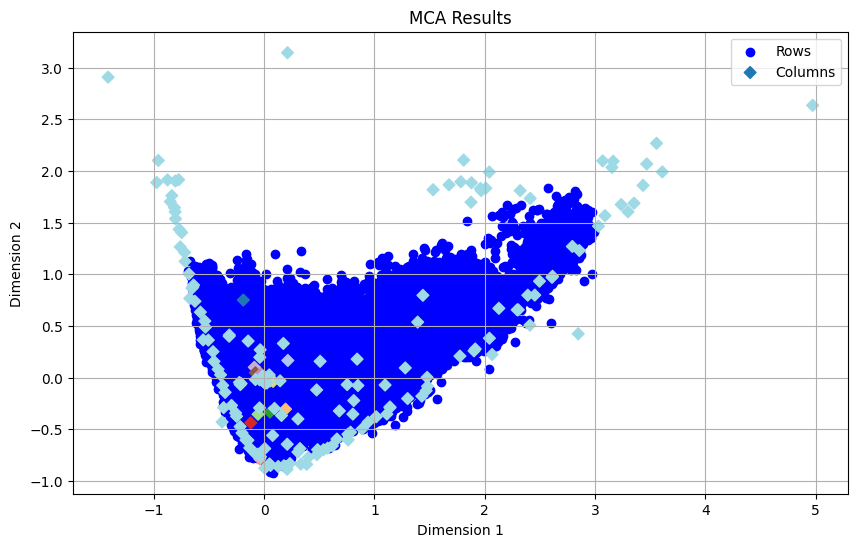

In [40]:
# Plot MCA results
plt.figure(figsize=(10, 6))

# Scatter plot for rows with different colors
row_coords = mca.row_coordinates(sampled_df)
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c='blue', label='Rows')

# Scatter plot for columns with different colors
column_coords = mca.column_coordinates(sampled_df)
num_categories = column_coords.shape[0]
colors = plt.cm.tab20(np.arange(num_categories))  # Using tab20 colormap with 20 colors
plt.scatter(column_coords.iloc[:, 0], column_coords.iloc[:, 1], c=colors, marker='D', label='Columns')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [ ]:
# Correlation
# numeric_columns = sampled_df.select_dtypes(include='number')
# death_correlation_matrix = numeric_columns.corr()
# print(death_correlation_matrix)

In [ ]:
# Plot the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(death_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Death Correlation Matrix')
# plt.show()

# **Data Mining: Artificial Neural Network**

In [ ]:
# import packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [109]:
# select features for model
selected_features = [col for col in encoded_df.columns if col != 'manner_of_death']

target_variable = 'manner_of_death'

In [110]:
# select X and y variables
X = encoded_df[selected_features]
y = encoded_df[target_variable]

In [111]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

,detail_age,education_2003_revision_1.0,education_2003_revision_2.0,education_2003_revision_3.0,education_2003_revision_4.0,education_2003_revision_5.0,education_2003_revision_6.0,education_2003_revision_7.0,education_2003_revision_8.0,education_2003_revision_9.0,...,race_5,race_6,race_7,race_18,race_28,race_38,race_48,race_58,race_68,race_78
2538954,0.513514,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
644662,0.648649,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1144144,0.261261,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2381304,0.675676,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1033484,0.702703,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783544,0.792793,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1735526,0.729730,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1650896,0.540541,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1521299,0.657658,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Basic ANN Model withOUT Hidden Layers

In [76]:
# build the ANN model
model_nolay = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# compile the model
model_nolay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'keras' is not defined

In [ ]:
# train the model
model_nolay.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
# evaluate the model
loss_nolay, accuracy_nolay = model_nolay.evaluate(X_test, y_test)
print(f"Test accuracy (Model_nolay): {accuracy_nolay}")

# Basic ANN Model with Hidden Layers

In [ ]:
# build the ANN model --> 3 hidden layers, 64 neurons on 1st, 32 neurons on 2nd, and 1 output neuron on last
model_lay = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train the ANN model
model_lay.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
# evaluate the model
loss_lay, accuracy_lay = model_lay.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_lay}")

In [ ]:
# visualize the ANN model
def visualize_model(model_lay):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_lay.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture")
    plt.savefig('model_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the model
visualize_model(model_lay)

# ANN Model w/ Reduced Complexity (Reduced amount of hidden layers)

In [ ]:
# build model with reduced complexity --> 3 hidden layers, 32 neurons on 1st, 16 neurons on 2nd, and 1 output neuron on last
model_red = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_red.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model with reduced complexity
model_red.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
# evaluate the model with reduced complexity
loss_red, accuracy_red = model_red.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_red}")

In [ ]:
# visualize model with reduced complexity
def visualize_model(model_red):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model_red.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Reduced Complexity)")
    plt.savefig('model_red_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_red)

# ANN Model with Regularization

In [ ]:
# build ANN the model with minimal hidden layers and dropout regularization (discussed in textbook)
model_reg = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(1, activation='sigmoid')  # Binary classification, hence using 'sigmoid'
])

# Compile the model
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train model
model_reg.fit(X_train, y_train, epochs=10, batch_size=32)

In [77]:
# evaluate model
loss_reg, accuracy_reg = model_reg.evaluate(X_test, y_test)
print(f"Test accuracy (Model_reg): {accuracy_reg}")

NameError: name 'model_reg' is not defined

In [ ]:
# visualize model with dropout reg
def visualize_model(model):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Model_reg)")
    plt.savefig('model_reg_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_reg)

# Summary

In [ ]:
# model eval values
eval_results = {
    'Model': ['Model_nolay', 'Model_lay', 'Model_red', 'Model_reg'],
    'Test Loss': [loss_nolay, loss_lay, loss_red, loss_reg],
    'Test Accuracy': [accuracy_nolay, accuracy_lay, accuracy_red, accuracy_reg]
}

# create DataFrame for eval results
eval_df = pd.DataFrame(eval_results)

# Display the table
print(eval_df)


In [ ]:
# The 'loss' value in the context of neural network training represents the value of the loss function during the training process.
# The loss function measures how well the model's predictions match the actual target values (ground truth) during training.
# The objective of training a neural network is to minimize this loss function.

# used cross-entropy.